# Supplementary Materials
This code accompanies the paper *Asymptotic Convergence of Gradient Descent for Linear Regression Least Squares Optimization* (Lipshitz, 2017)

## Initialization

In [1]:
from pylab import *
from numpy import random as random
random.seed(1)
N=1000.
w = array([14., 30.]); 
x = zeros((2, int(N))).astype(float32)
x[0,:] = arange(N).astype(float32)
x[1,:] = 1
y = w.dot(x) + random.normal(size=int(N), scale=100.)

## Defining Regression 

In [133]:
yh = lambda xs, ws: \
    ws.dot(xs)
    
grad = lambda ys, yhs, xs: \
    (1./xs.shape[1])*sum((yhs-ys)*xs).astype(float32)
    
delta = lambda gs, a: \
    a*gs
    
def regress(y, x, alpha, T=1000, wh=None, **kwargs):

    wh = random.normal(2, size=2)
    whs = zeros((T, 2))
    whs[0,:] = wh
    for i in xrange(1,T): 
        wh+=delta(grad(y,yh(x,wh), x), alpha)
        whs[i,:] = wh.copy()
    return wh, whs

In [134]:
def regrSample(y, x, alpha, T=1000, N=10, **kwargs):
    out = map(
        lambda a: \
        regress(y,x, alpha, T=T), xrange(N)
    )
    trains = array([o[1] for o in out])
    wDist = array([o[0] for o in out])
    
    return wDist, trains

def statsRegr(*args, **kwargs):
    wDist, trains = regrSample(*args, **kwargs)
    return np.mean(trains, axis=0), np.std(trains, axis=0)

## Running Regression above and Below the Upper Bound on $\alpha$

The theoretically derived bounds on $\alpha$ are $$\alpha \in  \left( -2\frac{N}{|\mathbf{x}|^2}, 0 \right]$$

Other $\alpha$ values diverge

In [258]:
def plotDynamicsForAlpha(alpha, axTitle, T=1000, N=10):
    t = np.arange(T)
    mu, sig = statsRegr(y, x, alpha, T=T, N=N)
    plot(mu[:,0], 'r:', label='$w_1$')
    plot(mu[:,1], 'b:', label='$w_2$')
    fill_between(t, \
                 mu[:,0]+sig[:,0], \
                 mu[:,0]-sig[:,0], \
                 facecolor='red', alpha=0.5)
    fill_between(t,\
                 mu[:,1]+sig[:,1], \
                 mu[:,1]-sig[:,1], \
                 facecolor='blue', alpha=0.5)
    xlabel("t [Iterations]", fontdict={'fontsize':fs*.8})
    yl = ylabel("$w_{i,t}$",fontdict={'fontsize':fs*.8})
    yl.set_rotation('horizontal')
    title(axTitle, fontdict={'fontsize':fs})
    tight_layout()
    return mu, sig



In [259]:
alphaData = [
    ("$a=2$", 2),
    ("$a=0$",0.),
    ("$a=-0.5N/x^2$",-0.5*N/linalg.norm(x[0,:])**2),
    ("$a=-N/x^2$", -N/linalg.norm(x[0,:])**2),
    ("$a=-1.3N/x^2$", -1.3*N/linalg.norm(x[0,:])**2),
    ("$a=-1.6N/x^2$", -1.6*N/linalg.norm(x[0,:])**2),
    ("$a=-1.99N/x^2$", -1.99*N/linalg.norm(x[0,:])**2),
    ("$a=-2N/x^2$", -2*N/linalg.norm(x[0,:])**2)
]

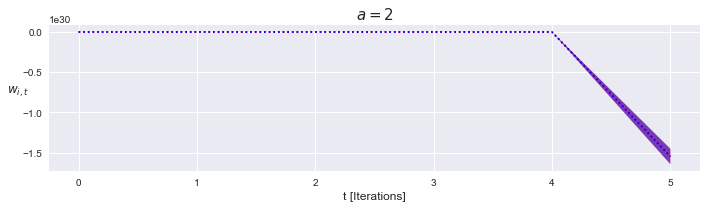

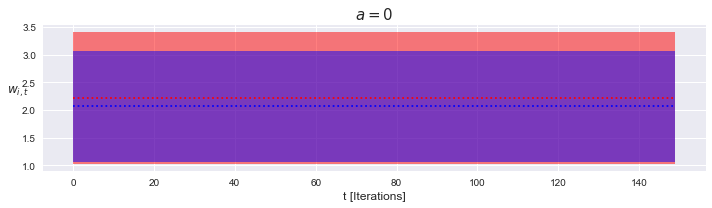

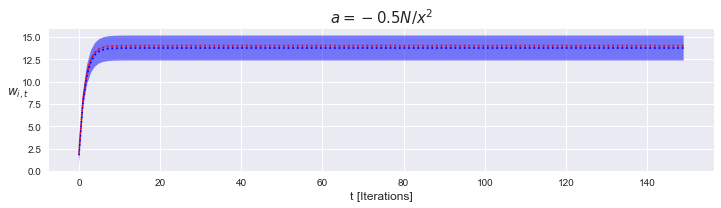

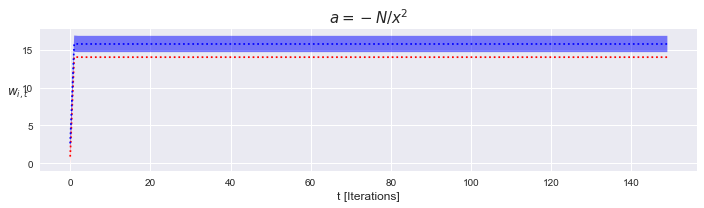

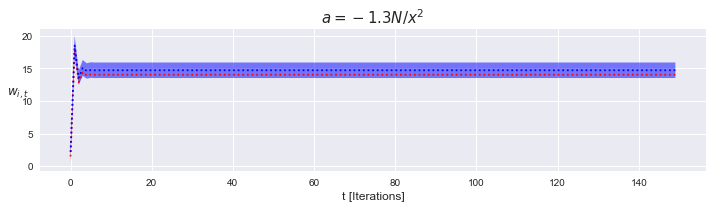

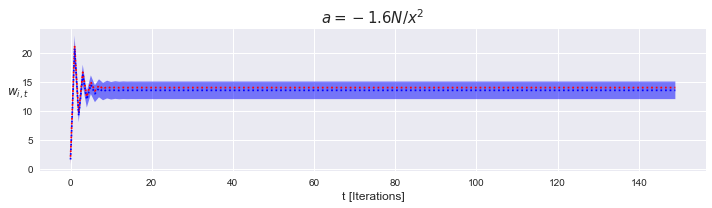

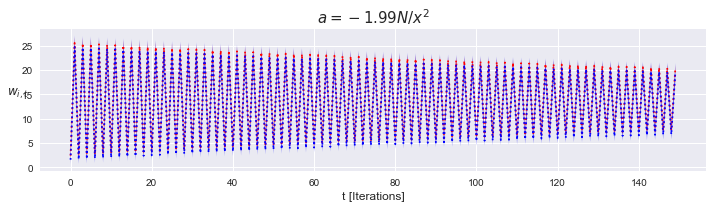

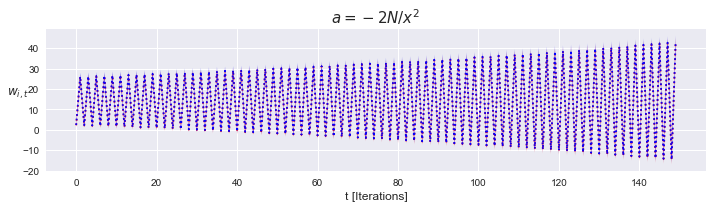

In [260]:
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
fs = 15
figure(figsize=(10,3*len(alphaData)))
outs = []
for i, d in enumerate(alphaData):
    k, v = d
#     subplot(len(alphaData),1, i+1)
    figure(figsize=(10,3))
    outs.append(plotDynamicsForAlpha(v, k, T=150 ))

tight_layout()
# suptitle("Dynamical Learning Trajectories for Significant Alpha Values", y=1.08, fontdict={'fontsize':20});


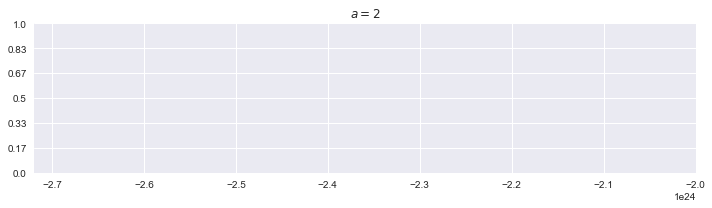

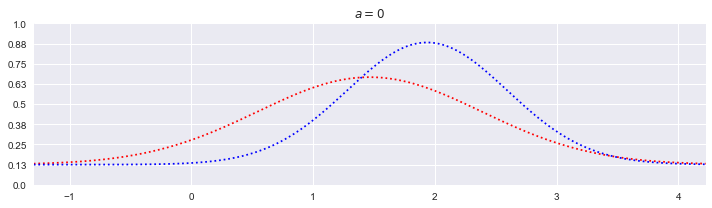

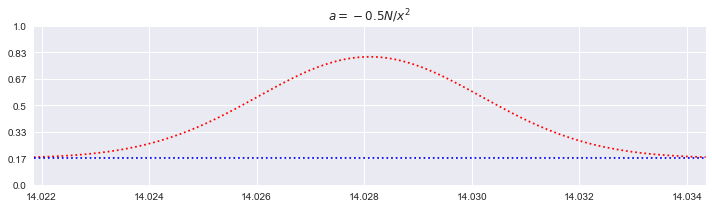

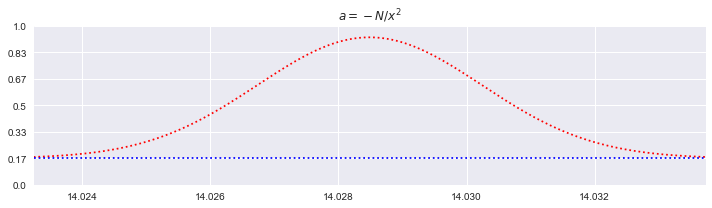

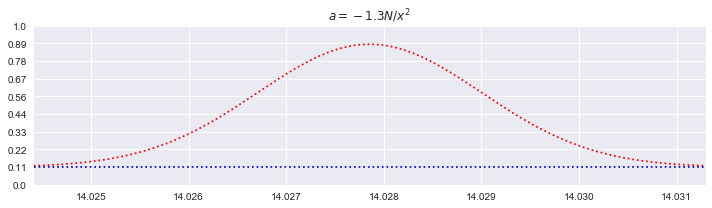

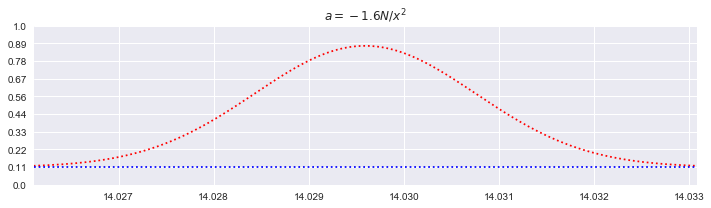

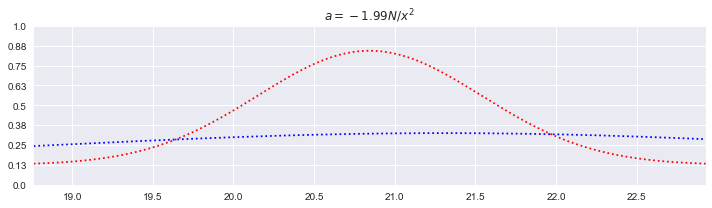

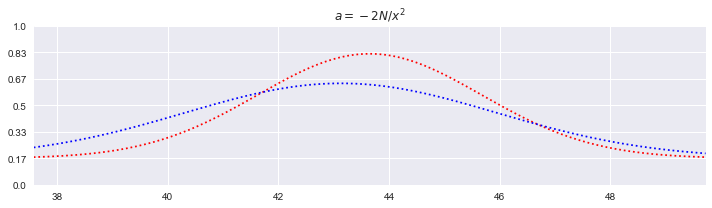

In [245]:

for i, axtitle in enumerate(alphaData):
    axtitle, axnum = axtitle
    mu, sig = outs[i]
    figure(figsize=(10,3))
    
    if np.sum(np.isnan(mu)) > 0:
        k=2
        idx0=argwhere(~np.isnan(mu[:,0]))[-1]-1
        idx1=argwhere(~np.isnan(sig[:,0]))[-1]-1
        idx = min(idx0, idx1)
        xmin = max(mu[idx,0]-k*sig[idx,0], mu[idx,0]-k*sig[idx,0])
        xmax = min(mu[idx,0]+k*sig[idx,0], mu[idx,0]+k*sig[idx,0])
        x_axis = np.linspace(xmin,xmax, num=300);
    else: 
        xmin = max(mu[-1,0]-3*sig[-1,0], mu[-1,0]-3*sig[-1,0])
        xmax = min(mu[-1,0]+3*sig[-1,0], mu[-1,0]+3*sig[-1,0])
        x_axis = np.linspace(xmin,xmax, num=300);

    plt.plot(x_axis, norm.pdf(x_axis,mu[-1,0],sig[-1,0]),'r:');
    plt.plot(x_axis, norm.pdf(x_axis,mu[-1,1],sig[-1,1]), 'b:');
    xlim(xmin = xmin, xmax=xmax)
    p, v = yticks()
    plt.yticks(p,map(lambda w: round(w, 2),linspace(0, 1, num=len(p))))
    title(axtitle)
    tight_layout()


In [280]:
x.shape

(2, 1000)

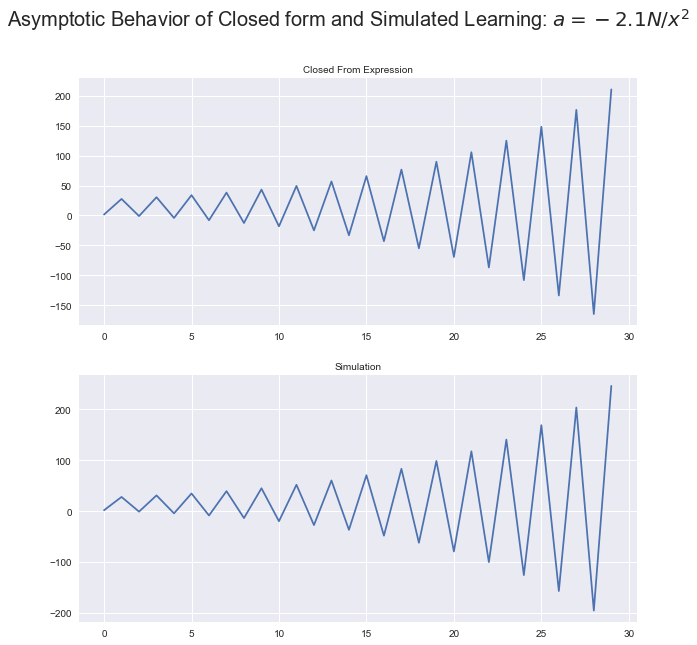

In [297]:
figure(figsize=(10,10))
subplot(2,1,1)
title("Closed From Expression", fontdict={'fontsize':10})
T = 30
w0 = random.normal(2, size=2)
t = np.arange(T)

a = -2.1*N/linalg.norm(x[0,:])**2
beta2 = (1/N)*a*x[0,:].dot(x[0,:])
beta1 = -(1/N)*a*x[0,:].dot(y)
ws = w0[0]*(beta2+1)**t - beta1*(1-(beta2+1)**t)/beta2
# ws = w0[0]*(-1)**t + ((-1)**t -1)*x[0,:].dot(y)/linalg.norm(x[0,:])**2
plot(ws)

subplot(2,1,2)
title("Simulation", fontdict={'fontsize':10})
wh = w0
whs = zeros((T, 2))
whs[0,:] = wh
for i in xrange(1,T): 
    wh+=delta(grad(y,yh(x,wh), x), a)
    whs[i,:] = wh.copy()
plot(whs[:,0])
suptitle(("Asymptotic Behavior "
         "of Closed form and Simulated Learning: $a = -2.1N/x^2$"), fontdict={"fontsize":20})

## $\alpha = \sup A$

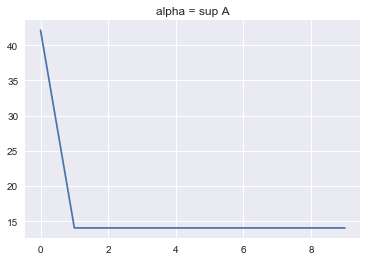

In [82]:
t = arange(0,10)
ws = (0**t)*(w0[0]+x[0,:].dot(y)/linalg.norm(x[0,:])**2) + x[0,:].dot(y)/linalg.norm(x[0,:])**2
figure()
ax = subplot(111)
ax.set_title("alpha = sup A")
ax.plot(ws)

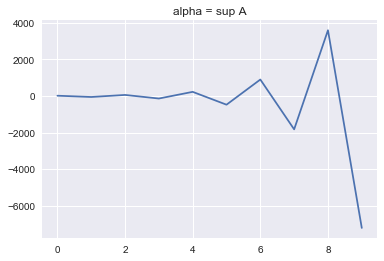

In [89]:
t = arange(0,10)
ws = ((-1)**t)*w0[0] - (x[0,:].dot(y)/linalg.norm(x[0,:])**2) + (-2)**t*x[0,:].dot(y)/linalg.norm(x[0,:])**2
figure()
ax = subplot(111)
ax.set_title("alpha = sup A")
ax.plot(ws)